In [2]:
%matplotlib inline
#用于画图，将整个页面有这个写入

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.data.shape

(178, 13)

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
#实例化
#训练集带入实例化后的模型去进行训练，使用的接口是fit
#使用其他接口将测试集导入我们训练好的模型，去获取我们希望获取的结果（score，Ytest）

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [8]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)
print(f"Single Tree:{score_c}",f"Radom Forest:{score_r}")
print("Single Tree:{}".format(score_c),"Radom Forest:{}".format(score_r))

Single Tree:0.9259259259259259 Radom Forest:1.0
Single Tree:0.9259259259259259 Radom Forest:1.0


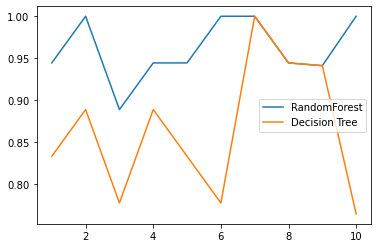

In [9]:
#交叉验证：cross_val_score

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1,11), rfc_s, label = "RandomForest")
plt.plot(range(1,11), clf_s, label = "Decision Tree")
plt.legend()
plt.show()

RandomForest:
0.9777777777777779
DecisionTree:
0.8594771241830065


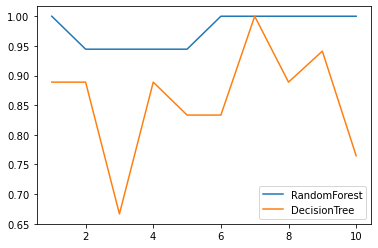

In [12]:
#====================一种更加有趣也更简单的写法===================#
# """
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"
# """

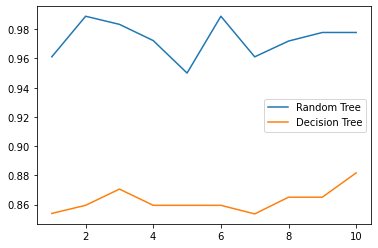

In [23]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=15)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11), rfc_l, label = "Random Tree")
plt.plot(range(1,11), clf_l, label = "Decision Tree")
plt.legend()
plt.show()
    

0.9888888888888889 57


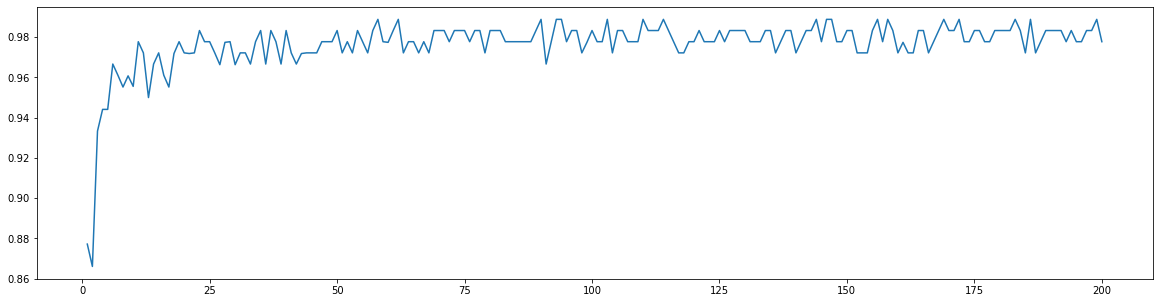

In [14]:
#####【TIME WARNING: 2mins 30 seconds】#####
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [24]:
#random_state参数 在随机森林中随机生成一片森林
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [30]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain) 


In [31]:
#随机森林的重要属性之一：estimators_，查看森林中树的状况
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [32]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [34]:
#bootstrap & oobscore 属性

#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

#重要属性oob_score_
rfc.oob_score_

0.9775280898876404

In [35]:
rfc.feature_importances_

array([0.11517652, 0.03907688, 0.01649021, 0.01644381, 0.02550114,
       0.03038299, 0.16160947, 0.00945584, 0.02130734, 0.16960535,
       0.08050325, 0.12732585, 0.18712134])

In [47]:
#重要接口 apply, fit, predict,score,predict_proba
#大家可以分别取尝试一下这些属性和接口
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)

In [46]:
rfc.score(Xtest,Ytest)

1.0

In [39]:
rfc.apply(Xtest)#apply返回每个测试样本所在的叶子节点的索引

array([[ 1,  5,  3, ...,  1, 14, 11],
       [ 6,  9, 15, ...,  7, 23, 17],
       [ 1,  5,  3, ...,  1, 14, 11],
       ...,
       [ 6, 11, 15, ...,  7, 23, 20],
       [ 1, 11,  3, ...,  1, 14, 11],
       [ 3, 11,  8, ...,  3,  6,  5]], dtype=int64)

In [41]:
rfc.predict(Xtest)
#predict返回每个测试样本的分类/回归结果,返回对测试集预测的标签

array([1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 1, 1, 0, 1, 2])

In [42]:
rfc.predict_proba(Xtest)
#返回每一个样本对应的每一类标签的概率

array([[0.04, 0.92, 0.04],
       [0.96, 0.  , 0.04],
       [0.  , 0.96, 0.04],
       [0.  , 0.12, 0.88],
       [0.16, 0.84, 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.36, 0.52, 0.12],
       [0.  , 0.96, 0.04],
       [0.96, 0.04, 0.  ],
       [0.  , 0.24, 0.76],
       [0.92, 0.08, 0.  ],
       [0.52, 0.32, 0.16],
       [0.  , 0.08, 0.92],
       [0.96, 0.04, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.16, 0.8 , 0.04],
       [1.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.8 , 0.2 , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 0.16, 0.84],
       [0.04, 0.  , 0.96],
       [0.92, 0.08, 0.  ],
       [0.04, 0.72, 0.24],
       [0.08, 0.  , 0.92],
       [0.  , 0.96, 0.04],
       [0.12, 0.84, 0.04],
       [0.08, 0.72, 0.2 ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.92, 0.04, 0.04],
 

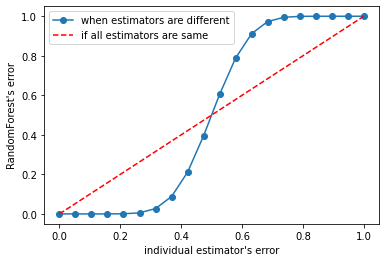

In [52]:
import numpy as np
x = np.linspace(0,1,20) 
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()